In [2]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pkl

In [3]:
sys.path.insert(0, '../lib/')

In [4]:
from util import *
from graph_utils import *

In [5]:
G = nx.generators.random_graphs.watts_strogatz_graph(10000, 20, 0.3)
len(G)

10000

In [6]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################

    np.random.seed(0)

    T = 10
    epsilon = 0.001
    alphavals = np.arange(0,50,0.5)
    num_times = 10

    n = len(G)
    p = 0.1
    
    raw_data = []
    exp_inf_list = []
    exp_inf_std = []
    n_vacc_size = []
    xlist_alpha = {}
    ts = {}
    for alpha in alphavals:
        zs = []
        vacc_size = []
        xlist = []
        ts[alpha] = []
        
        print("alpha: ", alpha)

        for i in range(num_times):
            x = {}
            Cvacc = {}
            Cinf = {};
            
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)/n
                
            x, nviol, t = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                
                ts[alpha].append(t)
                
                z = exp_infsize(G, x, p)
                zs.append(z)
                
                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)
                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)


alpha:  0.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
alpha:  0.5
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components don

In [23]:
# print(exp_inf_list)
# print(exp_inf_std)

In [13]:
z4 = [0.0, 0.0, 9.999999999999994e-10, 8.246697999999998e-05, 0.00077977594, 0.23327573042, 0.5838840091399999, 0.6404053490200001, 0.64090826622, 0.6408522431400001, 0.6396769253, 0.6404759722800002, 0.63989662368, 0.6400237236, 0.6405561866400001, 0.63992812188, 0.64096520876, 0.6406794421399999, 0.6401549631, 0.6411677983799999, 0.6404261499, 0.64028960586, 0.6407787341599999, 0.6406397082799999, 0.6403941279600002, 0.6403932761, 0.64023582442, 0.6409372061800003, 0.64033570744, 0.6409500021, 0.63935786774, 0.64082856312, 0.64007175406, 0.6403654485400001, 0.6402689084800001, 0.6399753561, 0.6401644462800001, 0.64051319076, 0.64112451078, 0.6410811833000001, 0.6411865096799999, 0.6403001234399999, 0.64011793576, 0.64014608558, 0.6403500891, 0.6404096971400001, 0.6399877009799999, 0.6405138354, 0.64012428004, 0.64035646574, 0.64039565842, 0.64079394042, 0.6407695276600001, 0.6403587606000001, 0.6410859415799999, 0.6403995040399999, 0.6406658283200001, 0.64028089136, 0.64066219742, 0.6407737433199999, 0.64043878306, 0.64066032616, 0.6409043023, 0.64047699462, 0.64040279684, 0.6403474364, 0.6402550289199999, 0.64007464106, 0.6399982856400002, 0.6407309739799999, 0.64067137776, 0.6403410324400001, 0.6403871624999999, 0.64062734882, 0.63980212546, 0.6407589489200001, 0.64074629562, 0.64090455534, 0.64034617486, 0.64038196204, 0.6406067359200001, 0.64050053272, 0.6406119969599999, 0.64060743198, 0.6400322357799999, 0.6405147936999999, 0.6406293976, 0.6404817560399999, 0.64024506504, 0.64100387558, 0.6405497411400001, 0.64072713678, 0.6404160573, 0.6397509677600001, 0.6407474011, 0.6401222516599999, 0.6406013477799999, 0.6403800814999999, 0.64053108348, 0.64082809974]
z4std = [0.0, 0.0, 2.9999999999999987e-09, 6.89021087921114e-07, 4.3224206879113495e-05, 0.002803060211965735, 0.004209512020464363, 0.0009083377537115729, 0.0011325206137607394, 0.0006550268222186779, 0.001014255512750933, 0.001006442829877221, 0.0011907206457075973, 0.0010874852097706377, 0.0005243891449829751, 0.0010133912328189611, 0.000750789294793126, 0.0009755715423008651, 0.0014611228376334299, 0.0010477154847076276, 0.0009218121865590297, 0.001081083639627498, 0.0010526453020674874, 0.0012508127486112344, 0.0016567282027704741, 0.001117510666738926, 0.0009594448097732092, 0.0008939464470740655, 0.001379445477128367, 0.0008738513266383851, 0.0012289288168038013, 0.0012641707748455623, 0.0010512236093849407, 0.0005314045963480958, 0.001006275957022013, 0.0012354778181553898, 0.0016223416241687976, 0.0012110088549618873, 0.0012127961911237864, 0.0008874725028362373, 0.0009928459817767855, 0.0015457514695565453, 0.0011655236912749957, 0.0010989457489193406, 0.0010475726337260804, 0.0013878940673693275, 0.001212342700067199, 0.0010303488329718583, 0.0006207575197728118, 0.0013020133125441645, 0.0006843118147614669, 0.0012310740134269282, 0.0006030657307669851, 0.00132438090233027, 0.0009032184997674408, 0.0011445333568012, 0.0008017439402336768, 0.0009535761155056527, 0.001084784038671226, 0.001094410663903468, 0.0010640638928455914, 0.0006945874096122821, 0.001081315634157615, 0.0006475727037905257, 0.0008045259119391083, 0.0013262105618635773, 0.0011003984772146047, 0.0009845422817072512, 0.0013306618975462738, 0.0008898529931533533, 0.0010752114836164253, 0.0009919397050417536, 0.0007288641027636474, 0.0010382003391381806, 0.0007737544709230475, 0.0011820399230536047, 0.001305833352071543, 0.0012057612651890795, 0.0012169684380789292, 0.0011552040370025765, 0.0011829955818615505, 0.0007625663235820486, 0.0009459241216208352, 0.0007193635846599055, 0.0014976582189668423, 0.0010791594293448543, 0.0013345259900894516, 0.0013241921000329844, 0.0010868615490496497, 0.0008877757810605469, 0.0010572162210610544, 0.001006700400753165, 0.0008006403163124746, 0.0005495181851399703, 0.0008276827107253668, 0.0007650322919009777, 0.0015396815796741327, 0.0007299909467626527, 0.0008366564709463056, 0.0009383965554318217]

In [9]:
# print(n_vacc_size)

In [24]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)
# print(list(vacc_mean))
# print(list(vacc_std))

In [15]:
vacc_mean = [10000.0, 10000.0, 9999.9, 5948.1, 3804.4, 1740.7, 216.6, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vacc_std = [0.0, 0.0, 0.3, 13.171560272040665, 12.72949331277565, 12.198770429842508, 15.755633912984905, 0.6324555320336759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

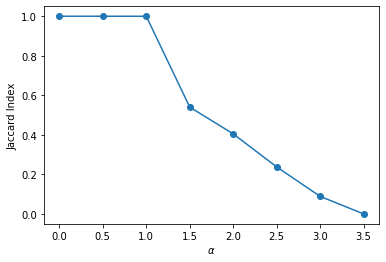

In [16]:
k = np.array(vacc_mean).astype(int)
zs, topk_list =  get_topk_exp_infsize(G, k, p) ## sorted by alpha
jaccard_mean, jaccard_std = plot_jaccard(alphavals, xlist_alpha, topk_list)

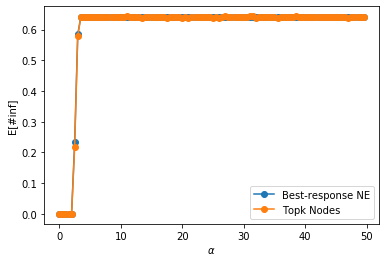

In [17]:
legend = ['Best-response NE', 'Topk Nodes']
plt.plot(alphavals, z4, 'o-')
plt.plot(alphavals, zs, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.show()

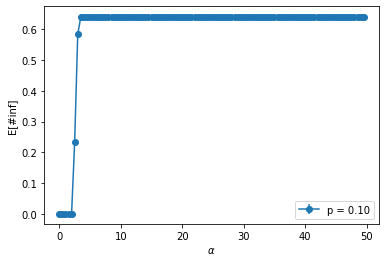

In [25]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.1]]
for y, ystd in zip(z,zstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.show()

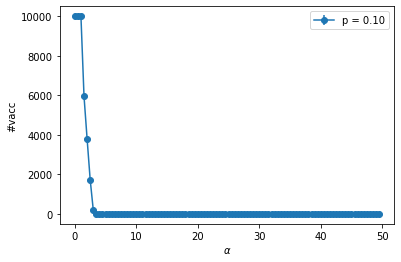

In [26]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.1]]
plt.errorbar(alphavals, vacc_mean, vacc_std, fmt='o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
plt.legend(legend)
plt.show()

In [20]:
max([G.degree(v) for v in G.nodes()])

32

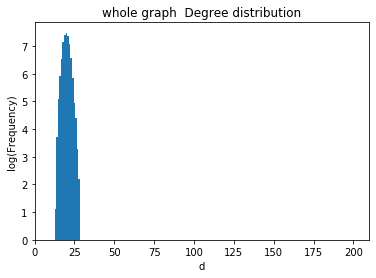

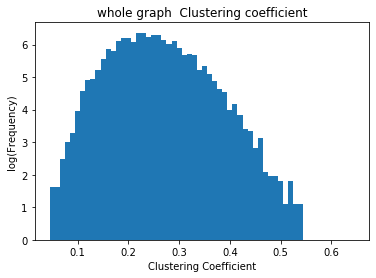

In [21]:
compare_degree(G, 'whole graph ')
compare_cc(G, 'whole graph ')

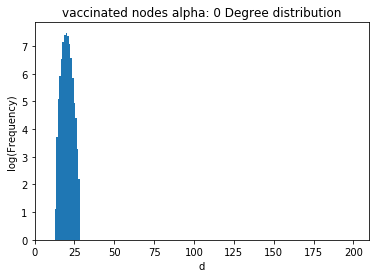

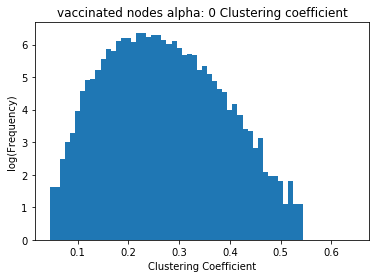

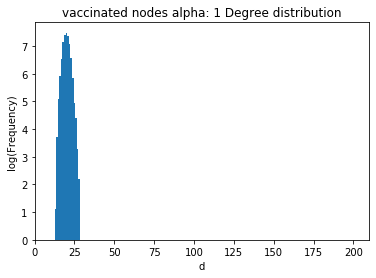

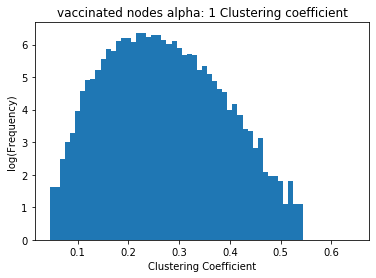

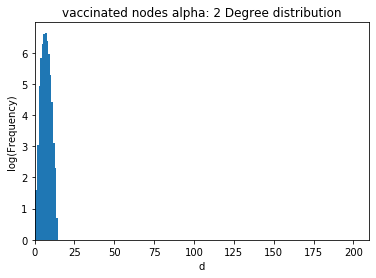

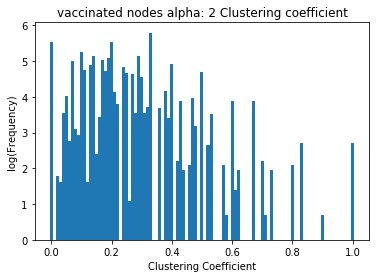

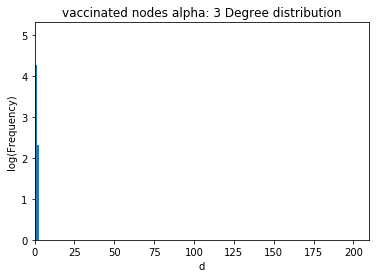

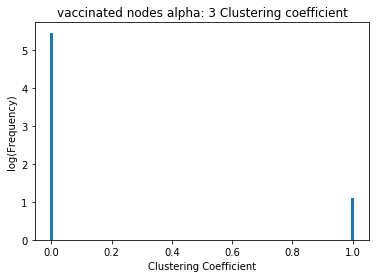

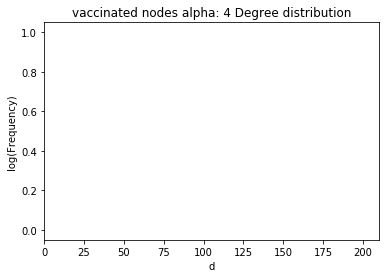

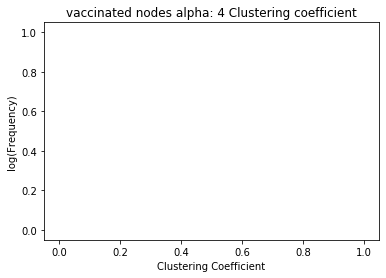

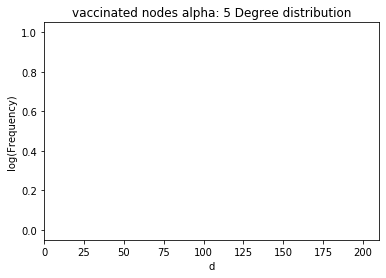

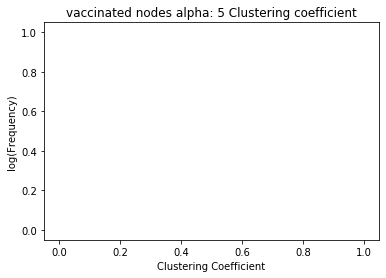

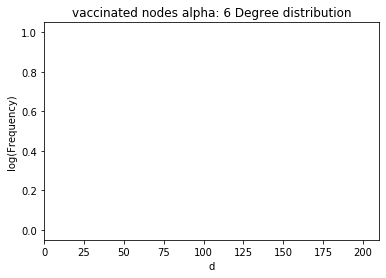

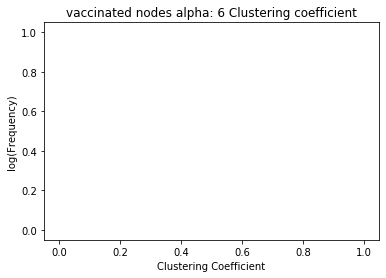

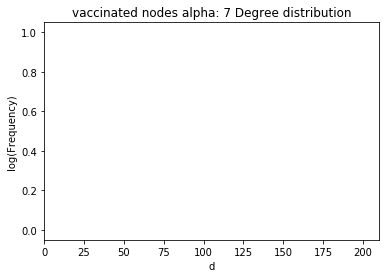

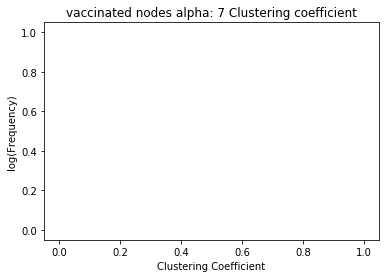

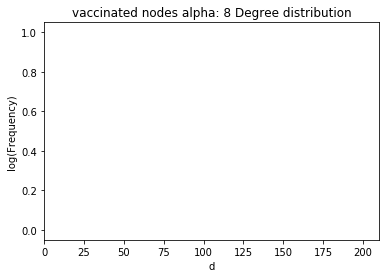

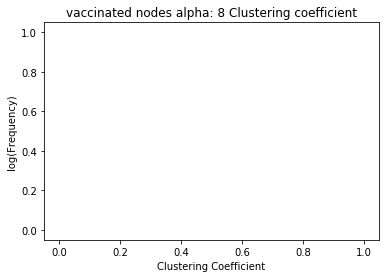

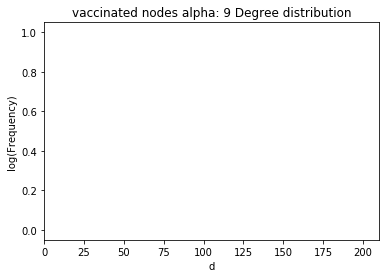

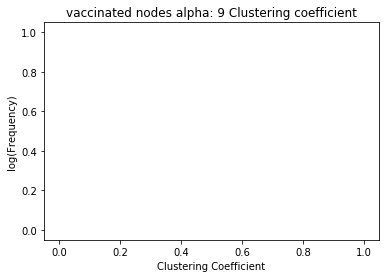

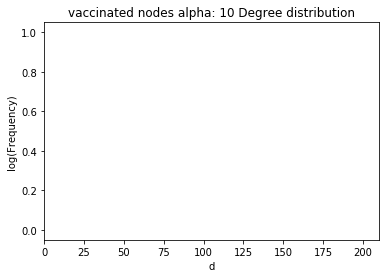

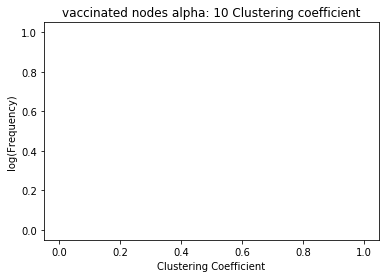

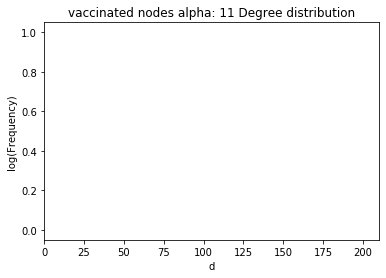

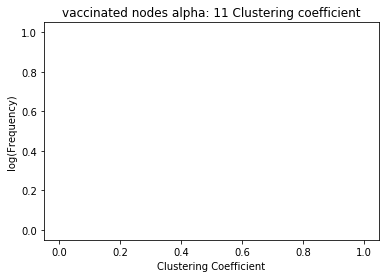

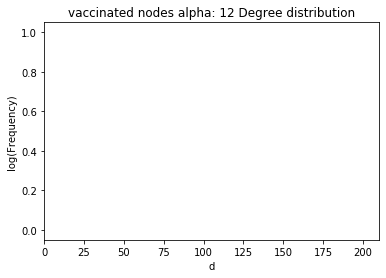

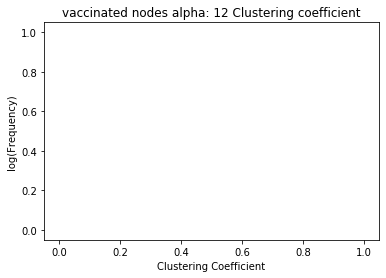

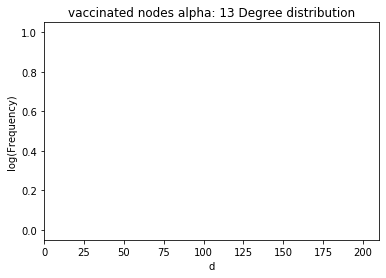

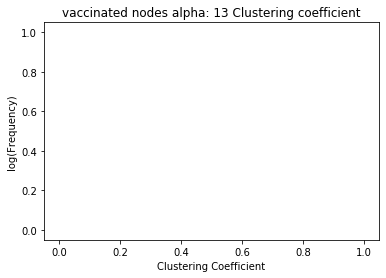

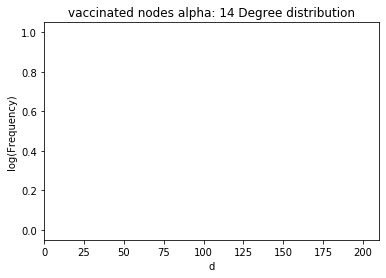

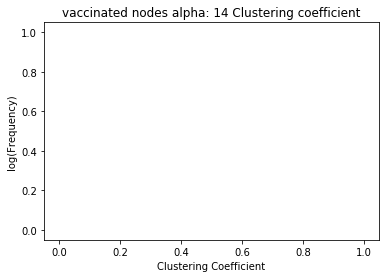

In [22]:
for alpha in range(15):
    v = set(get_provax(xlist_alpha[alpha][0]))
    s = G.subgraph(v)

    compare_degree(s, 'vaccinated nodes alpha: ' + str(alpha))
    compare_cc(s, 'vaccinated nodes alpha: ' + str(alpha))